In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
X = df.drop("medv",axis=1)
y = df["medv"]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [6]:
X_train.shape,X_test.shape

((354, 13), (152, 13))

<AxesSubplot:>

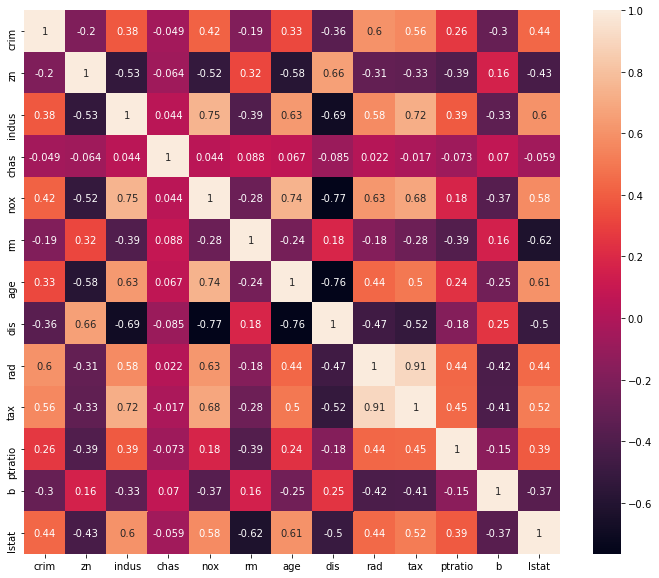

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [8]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [9]:
corr_features =  correlation(X_train,0.7)
len(set(corr_features))

3

In [10]:
corr_features

{'age', 'nox', 'tax'}

In [11]:
X_train.drop(corr_features,axis=1)

,crim,zn,indus,chas,rm,dis,rad,ptratio,b,lstat
141,1.62864,0.0,21.89,0,5.019,1.4394,4,21.2,396.90,34.41
272,0.11460,20.0,6.96,0,6.538,3.9175,3,18.6,394.96,7.73
135,0.55778,0.0,21.89,0,6.335,2.1107,4,21.2,394.67,16.96
298,0.06466,70.0,2.24,0,6.345,7.8278,5,14.8,368.24,4.97
122,0.09299,0.0,25.65,0,5.961,2.0869,2,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0,5.708,4.7211,5,19.6,391.13,11.74
192,0.08664,45.0,3.44,0,7.178,6.4798,5,15.2,390.49,2.87
117,0.15098,0.0,10.01,0,6.021,2.7474,6,17.8,394.51,10.30
47,0.22927,0.0,6.91,0,6.030,5.6894,3,17.9,392.74,18.80


In [12]:
X_test.drop(corr_features,axis=1)

,crim,zn,indus,chas,rm,dis,rad,ptratio,b,lstat
329,0.06724,0.0,3.24,0,6.333,5.2146,4,16.9,375.21,7.34
371,9.23230,0.0,18.10,0,6.216,1.1691,24,20.2,366.15,9.53
219,0.11425,0.0,13.89,1,6.373,3.3633,5,16.4,393.74,10.50
403,24.80170,0.0,18.10,0,5.349,1.7028,24,20.2,396.90,19.77
78,0.05646,0.0,12.83,0,6.232,5.0141,5,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0,7.147,6.0622,3,18.7,396.90,5.33
428,7.36711,0.0,18.10,0,6.193,1.9356,24,20.2,96.73,21.52
385,16.81180,0.0,18.10,0,5.277,1.4261,24,20.2,396.90,30.81
308,0.49298,0.0,9.90,0,6.635,3.3175,4,18.4,396.90,4.54


**Let try with Big Dataset**

https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv("santander.csv",nrows=10000)

In [15]:
df.shape

(10000, 371)

In [16]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [17]:
X = df.drop("TARGET",axis=1)
y = df["TARGET"]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [19]:
X_train.shape,X_test.shape

((7000, 370), (3000, 370))

In [20]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [21]:
corr_features =  correlation(X_train,0.8)
len(set(corr_features))

191

In [22]:
corr_features

{'delta_imp_aport_var17_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_compra_var44_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10_ult1',
 'ind_var10cte_ult1',
 'ind_var12',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_corto_0',
 'ind_var13_largo',
 'ind_var17',
 'ind_var20',
 'ind_var24',
 'ind_var24_0',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 

In [23]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,ind_var1_0,...,saldo_medio_var13_corto_hace3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,var38
9394,18882,2,23,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,75170.310000
898,1778,2,79,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,57855.510000
2398,4806,2,38,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,117310.979016
5906,11854,2,48,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,50659.230000
2343,4697,2,23,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,43843.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,8026,2,28,0.0,237.45,0.0,0,300.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,103622.310000
7375,14795,2,23,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,51898.800000
9307,18726,2,25,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,99251.790000
8394,16923,2,50,0.0,0.00,0.0,0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0.0,0,117310.979016
